<a href="https://colab.research.google.com/github/Juethro/DataQuest_2023_NewQuest/blob/A1/DataQuest2023_trainpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Library

In [19]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tahap-penyisihan-oq-dataquestua

 68% 9.00M/13.2M [00:00<00:00, 85.2MB/s]
100% 13.2M/13.2M [00:00<00:00, 112MB/s] 


In [20]:
!unzip tahap-penyisihan-oq-dataquestua.zip -d datasets

Archive:  tahap-penyisihan-oq-dataquestua.zip
  inflating: datasets/sample_submission.csv  
  inflating: datasets/test.csv       
  inflating: datasets/train.csv      


In [42]:
import pandas as pd
import numpy as np

In [23]:
dft = pd.read_csv("datasets/train.csv")
dft

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1514746800,2017-12-31 19:00:00+00:00,28800,25.06 Celcius,NaN,24.55,131.53 C,24.44 C,25.69,1007,undetermined,NaN,97,0.9,13,0,0,0,0,99
341876,1514750400,2017-12-31 20:00:00+00:00,28800,24.51°C,NaN,24.17°C,25.58,23.89 C,25.13,1006,undetermined,undetermined,98,0.85 m/s,21.0°,,NaN,NaN,0,100
341877,1514754000,2017-12-31 21:00:00+00:00,28800,24.63 C,NaN,24.29,129.32,24,126.96 C,1007.0 hPa,NaN,undetermined,98,1.54 m/s,26.0 °,0,NaN,0,no_snow,97
341878,1514757600,2017-12-31 22:00:00+00:00,28800,26.68,NaN,24.71,29.76,25.02 C,27.25 °C,1008,undetermined,NaN,89.00%,1.46m/s,17,0.3 mm,0,0,volume:0,98


#Statistika Deskriptif

In [24]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

In [25]:
len(dft)

341880

In [26]:
dft.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
datetime,341880.0,899379000.0,3.552926e+08,283996800.0,591687900.0,899379000.0,1.207070e+09,1.514761e+09
time-zone,341880.0,28800.0,0.000000e+00,28800.0,28800.0,28800.0,2.880000e+04,2.880000e+04


#Data Prepocessing

In [27]:
dft.drop("time-zone", axis=1, inplace=True)
dft['temp'] = dft['temp'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['d_point'] = dft['d_point'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['feels'] = dft['feels'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['min_temp'] = dft['min_temp'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['max_temp'] = dft['max_temp'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['prssr'] = dft['prssr'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['hum'] = dft['hum'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['wind_spd'] = dft['wind_spd'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['wind_deg'] = dft['wind_deg'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft["clouds"] = dft["clouds"].str.extract(r'(\d+\.\d+|\d+)').astype(float)

dft["rain_1h"] = dft['rain_1h'].str.replace('zero', '0')
dft['rain_1h'] = dft['rain_1h'].replace('-1m', '-1')
dft["rain_1h"] = dft['rain_1h'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

dft["rain_3h"] = 0
dft["snow_1h"] = 0
dft["snow_3h"] = 0

In [28]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      341880 non-null  int64  
 1   datetime_iso  341880 non-null  object 
 2   temp          341880 non-null  float64
 3   visibility    51112 non-null   object 
 4   d_point       341880 non-null  float64
 5   feels         341880 non-null  float64
 6   min_temp      341880 non-null  float64
 7   max_temp      341880 non-null  float64
 8   prssr         341880 non-null  float64
 9   sea_level     192964 non-null  object 
 10  grnd_level    192919 non-null  object 
 11  hum           341880 non-null  float64
 12  wind_spd      341880 non-null  float64
 13  wind_deg      341880 non-null  float64
 14  rain_1h       320590 non-null  float64
 15  rain_3h       341880 non-null  int64  
 16  snow_1h       341880 non-null  int64  
 17  snow_3h       341880 non-null  int64  
 18  clou

In [29]:
dft.head(20)

,datetime,datetime_iso,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.00,0.82,320.0,0.00,0,0,0,100.0
1,284000400,1979-01-01 01:00:00+00:00,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.00,0.96,338.0,0.00,0,0,0,100.0
2,284004000,1979-01-01 02:00:00+00:00,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.00,1.22,339.0,0.00,0,0,0,99.0
3,284007600,1979-01-01 03:00:00+00:00,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.00,1.08,342.0,0.13,0,0,0,94.0
4,284011200,1979-01-01 04:00:00+00:00,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.00,0.86,336.0,0.34,0,0,0,100.0
5,284014800,1979-01-01 05:00:00+00:00,28.08,NaN,24.92,32.79,27.36,29.40,1010.0,NaN,NaN,83.00,0.84,7.0,3.33,0,0,0,100.0
6,284018400,1979-01-01 06:00:00+00:00,28.68,NaN,24.25,33.29,27.62,31.02,1010.0,undetermined,undetermined,77.00,0.82,309.0,8.01,0,0,0,100.0
7,284022000,1979-01-01 07:00:00+00:00,28.62,NaN,25.85,34.70,28.12,29.35,1010.0,NaN,not recorded,85.00,0.71,291.0,2.54,0,0,0,95.0
8,284025600,1979-01-01 08:00:00+00:00,26.55,NaN,24.21,26.55,26.09,26.83,1009.0,undetermined,undetermined,87.00,0.62,285.0,1.29,0,0,0,97.0
9,284029200,1979-01-01 09:00:00+00:00,26.38,NaN,24.97,26.38,25.68,29.02,1009.0,NaN,undetermined,92.00,0.44,294.0,0.39,0,0,0,92.0


In [30]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      341880 non-null  int64  
 1   datetime_iso  341880 non-null  object 
 2   temp          341880 non-null  float64
 3   visibility    51112 non-null   object 
 4   d_point       341880 non-null  float64
 5   feels         341880 non-null  float64
 6   min_temp      341880 non-null  float64
 7   max_temp      341880 non-null  float64
 8   prssr         341880 non-null  float64
 9   sea_level     192964 non-null  object 
 10  grnd_level    192919 non-null  object 
 11  hum           341880 non-null  float64
 12  wind_spd      341880 non-null  float64
 13  wind_deg      341880 non-null  float64
 14  rain_1h       320590 non-null  float64
 15  rain_3h       341880 non-null  int64  
 16  snow_1h       341880 non-null  int64  
 17  snow_3h       341880 non-null  int64  
 18  clou

In [31]:
dft.isna().sum()

datetime             0
datetime_iso         0
temp                 0
visibility      290768
d_point              0
feels                0
min_temp             0
max_temp             0
prssr                0
sea_level       148916
grnd_level      148961
hum                  0
wind_spd             0
wind_deg             0
rain_1h          21290
rain_3h              0
snow_1h              0
snow_3h              0
clouds               0
dtype: int64

In [32]:
dft.rain_1h

0         0.00
1         0.00
2         0.00
3         0.13
4         0.34
          ... 
341875    0.00
341876     NaN
341877    0.00
341878    0.30
341879    0.19
Name: rain_1h, Length: 341880, dtype: float64

In [33]:
dft['rain_1h'].fillna(0, inplace=True)

#Menghapus Variabel

In [34]:
columns_to_drop = ['datetime', 'visibility', 'sea_level', 'grnd_level']

dft = dft.drop(columns_to_drop, axis =1)

# # Menghapus dan mengambil kolom-kolom tersebut
# for column in columns_to_drop:
#     removed_column = dft.pop(column)

In [35]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_iso  341880 non-null  object 
 1   temp          341880 non-null  float64
 2   d_point       341880 non-null  float64
 3   feels         341880 non-null  float64
 4   min_temp      341880 non-null  float64
 5   max_temp      341880 non-null  float64
 6   prssr         341880 non-null  float64
 7   hum           341880 non-null  float64
 8   wind_spd      341880 non-null  float64
 9   wind_deg      341880 non-null  float64
 10  rain_1h       341880 non-null  float64
 11  rain_3h       341880 non-null  int64  
 12  snow_1h       341880 non-null  int64  
 13  snow_3h       341880 non-null  int64  
 14  clouds        341880 non-null  float64
dtypes: float64(11), int64(3), object(1)
memory usage: 39.1+ MB


In [36]:
dft.head()

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,1979-01-01 00:00:00+00:00,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.00,0,0,0,100.0
1,1979-01-01 01:00:00+00:00,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,0,0,0,100.0
2,1979-01-01 02:00:00+00:00,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,0,0,0,99.0
3,1979-01-01 03:00:00+00:00,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,0,0,0,94.0
4,1979-01-01 04:00:00+00:00,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,0,0,0,100.0


#Mendeteksi Outlier

In [37]:
from scipy import stats

columns_to_check = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']

# Hitung Z-score untuk setiap kolom
z_scores = stats.zscore(dft[columns_to_check])

# Tentukan ambang batas Z-score untuk deteksi outlier (misalnya, 2 atau 3)
threshold = 3

# Deteksi outlier
outliers = (z_scores > threshold).any(axis=1)

# Tampilkan baris-baris yang berisi outlier
dft[outliers]

                     datetime_iso   temp  d_point   feels  min_temp  max_temp  \
5       1979-01-01 05:00:00+00:00  28.08    24.92   32.79     27.36     29.40   
6       1979-01-01 06:00:00+00:00  28.68    24.25   33.29     27.62     31.02   
16      1979-01-01 16:00:00+00:00  24.60    24.43   25.70     23.69     25.39   
28      1979-01-02 04:00:00+00:00  27.05    24.70   30.56     26.50     27.95   
29      1979-01-02 05:00:00+00:00  27.18    24.83   30.91     26.65     28.49   
...                           ...    ...      ...     ...       ...       ...   
341866  2017-12-31 10:00:00+00:00  28.87    24.86   34.17     28.02     29.75   
341870  2017-12-31 14:00:00+00:00  26.93    25.15   30.54     26.53     27.69   
341871  2017-12-31 15:00:00+00:00  25.77   124.39   26.86     25.12     26.45   
341875  2017-12-31 19:00:00+00:00  25.06    24.55  131.53     24.44     25.69   
341877  2017-12-31 21:00:00+00:00  24.63    24.29  129.32     24.00    126.96   

         prssr     hum  win

In [38]:
from scipy import stats

# Tentukan kolom yang akan dianalisis (kolom numerik)
columns_to_check = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']

# Hitung Z-score untuk setiap kolom
z_scores = stats.zscore(dft[columns_to_check])

# Tentukan ambang batas Z-score untuk deteksi outlier (misalnya, 2 atau 3)
threshold = 3

# Deteksi outlier
outliers = (z_scores > threshold).any(axis=1)

# Gantikan outlier dengan nilai rata-rata
for column in columns_to_check:
    mean_value = dft[column].mean()
    dft.loc[outliers, column] = mean_value

# Tampilkan DataFrame yang telah menggantikan outlier dengan nilai rata-rata
dft

,datetime_iso,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,1979-01-01 00:00:00+00:00,24.750000,23.890000,25.760000,24.280000,25.220000,1012.000000,95.000000,0.820000,320.000000,0.000000,0,0,0,100.00000
1,1979-01-01 01:00:00+00:00,24.580000,23.730000,25.570000,23.990000,25.260000,1012.000000,95.000000,0.960000,338.000000,0.000000,0,0,0,100.00000
2,1979-01-01 02:00:00+00:00,26.600000,24.060000,26.600000,26.100000,27.390000,1012.000000,86.000000,1.220000,339.000000,0.000000,0,0,0,99.00000
3,1979-01-01 03:00:00+00:00,27.310000,24.370000,30.900000,26.590000,28.360000,1012.000000,84.000000,1.080000,342.000000,0.130000,0,0,0,94.00000
4,1979-01-01 04:00:00+00:00,27.410000,25.050000,31.540000,26.580000,28.310000,1011.000000,87.000000,0.860000,336.000000,0.340000,0,0,0,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,2017-12-31 19:00:00+00:00,28.296996,26.056234,31.092778,27.483902,29.359565,1070.965439,94.221361,1.474819,210.867372,0.370134,0,0,0,85.44976
341876,2017-12-31 20:00:00+00:00,24.510000,24.170000,25.580000,23.890000,25.130000,1006.000000,98.000000,0.850000,21.000000,0.000000,0,0,0,100.00000
341877,2017-12-31 21:00:00+00:00,28.296996,26.056234,31.092778,27.483902,29.359565,1070.965439,94.221361,1.474819,210.867372,0.370134,0,0,0,85.44976
341878,2017-12-31 22:00:00+00:00,26.680000,24.710000,29.760000,25.020000,27.250000,1008.000000,89.000000,1.460000,17.000000,0.300000,0,0,0,98.00000


#Grafik

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'd_point'}>,
        <Axes: title={'center': 'feels'}>,
        <Axes: title={'center': 'min_temp'}>],
       [<Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'prssr'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'wind_spd'}>],
       [<Axes: title={'center': 'wind_deg'}>,
        <Axes: title={'center': 'rain_1h'}>,
        <Axes: title={'center': 'rain_3h'}>,
        <Axes: title={'center': 'snow_1h'}>],
       [<Axes: title={'center': 'snow_3h'}>,
        <Axes: title={'center': 'clouds'}>, <Axes: >, <Axes: >]],
      dtype=object)

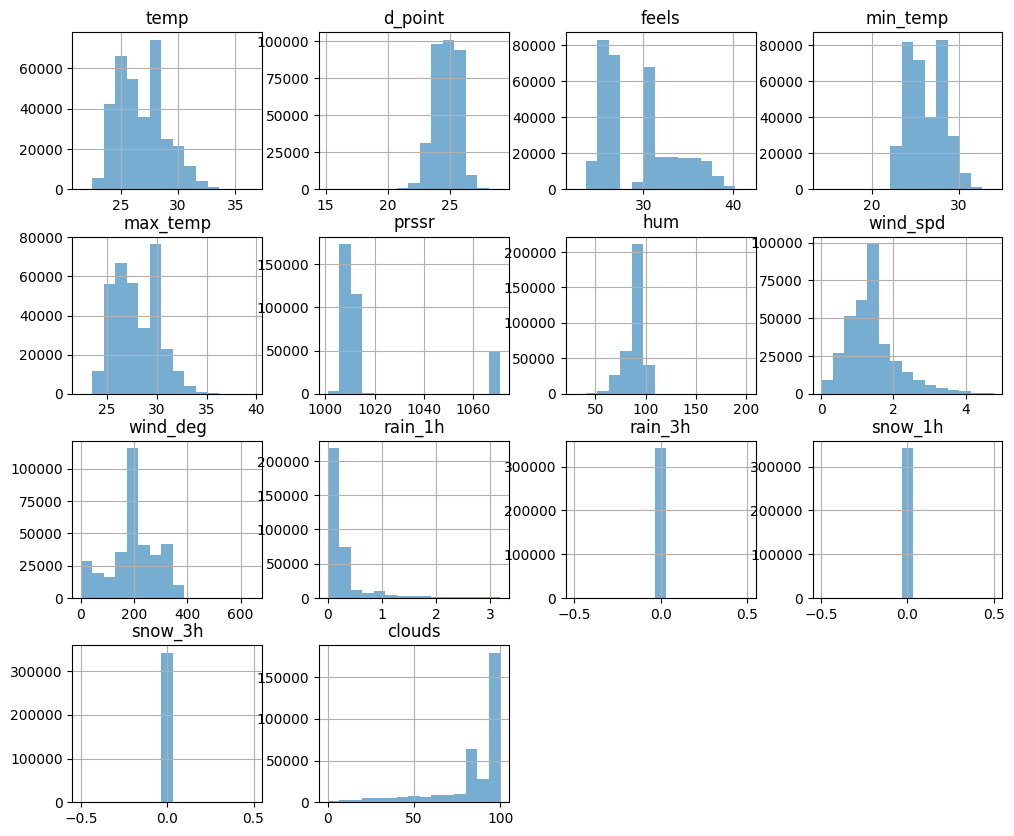

In [39]:
dft.hist(bins=15, figsize=(12,10), alpha=0.6, label=False)

In [40]:
dft.isna().sum()

datetime_iso    0
temp            0
d_point         0
feels           0
min_temp        0
max_temp        0
prssr           0
hum             0
wind_spd        0
wind_deg        0
rain_1h         0
rain_3h         0
snow_1h         0
snow_3h         0
clouds          0
dtype: int64

#Modelling

##Regresi Linier

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = dft[['temp','d_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']]
y = dft['rain_1h']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi (misalnya, MSE dan R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 0.2239860952051982
Root Mean Squared Error: 0.4732716927993879
R-squared: 0.06735227350598572


## Uploader

In [44]:
df_test = pd.read_csv('datasets/test.csv')

In [46]:
df_test

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_3h,snow_1h,snow_3h,clouds
0,1514764800,2018-01-01 00:00:00+00:00,28800,26.59 °C,NaN,23.66,26.59,26.02,27.16,1009,NaN,undetermined,84,1.45 m/s,355,0,NaN,no_snow,97
1,1514768400,2018-01-01 01:00:00+00:00,28800,26.51 C,NaN,24.92,26.51 °C,26.06,28.04,1009,NaN,undetermined,91,1.67 m/s,351,0mm,no-snow,0 milimeter,95
2,1514772000,2018-01-01 02:00:00+00:00,28800,28.68 C,NaN,25.71,34.68,28.03 C,29.3 C,1009.0 hPa.,NaN,NaN,84,1.72 m/s,345.0°,0 mm,volume:zero,0,90
3,1514775600,2018-01-01 03:00:00+00:00,28800,28.84 C,NaN,25.25,34.51,28.52,29.08 °C,1008,NaN,NaN,81,1.49,339.0°,0 milimeter,0,NaN,91
4,1514779200,2018-01-01 04:00:00+00:00,28800,29.75 Celcius,,24.62,35.38,29.31 C,30.57,1007,undetermined,undetermined,74,1.39 m/s,339.0°,NaN,0,volume:0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49363,1692471600,2023-08-19 19:00:00+00:00,28800,24.37 C,NaN,23.34,25.32,22.7°C,28.2 °C,1011.0 hPa,NaN,not-recorded,94,1.57,239.0°,NaN,no_snow,0,84
49364,1692475200,2023-08-19 20:00:00+00:00,28800,23.87 C,NaN,23.02,24.79 C,21.91,28.01 °C,1011,undetermined,undetermined,95,1.53,235.0°,0,NaN,0,70
49365,1692478800,2023-08-19 21:00:00+00:00,28800,23.87 Celcius,NaN,23.02,24.79,21.91,28.01,1011,NaN,unknown,95.00%,1.53 m/s,235,NaN,NaN,NaN,70
49366,1692482400,2023-08-19 22:00:00+00:00,28800,23.87°C,undefined,23.02,24.79,21.91,28.01 °C,1011.0hPa,undetermined,NaN,95.00%,1.53,235,NaN,0,NaN,70.00%


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = dft[['max_temp', 'rain_1h']]
y = dft['temp']  # Gantilah 'target_variabel' dengan target yang sesuai

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Ridge dengan parameter alpha (regularization strength)
alpha = 1.0  # Gantilah dengan nilai yang sesuai
model = Ridge(alpha=alpha)

# Melatih model pada data latih yang sudah dinormalisasi
model.fit(X_train_scaled, y_train)

# Membuat prediksi dengan model yang telah dilatih
y_pred = model.predict(X_test_scaled)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 191.54702533133155


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = dft[['d_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']]
y = dft['temp']  # Gantilah 'target_variabel' dengan target yang sesuai

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan StandardScaler untuk menormalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model RidgeCV dengan rentang alpha yang akan diuji
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]  # Sesuaikan dengan rentang yang Anda inginkan
model = RidgeCV(alphas=alphas, cv=5)  # Cross-validation digunakan untuk memilih alpha terbaik

# Melatih model pada data latih yang sudah dinormalisasi
model.fit(X_train_scaled, y_train)

# Membuat prediksi dengan model yang telah dilatih
y_pred = model.predict(X_test_scaled)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Alpha terbaik:", model.alpha_)

Mean Squared Error: 190.50943098840872
Alpha terbaik: 100.0


##Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = dft[['d_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']]
y = dft['temp']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi (misalnya, MSE dan R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 194.74111414073462
R-squared: -0.015110929102722492


##Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = dft[['d_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds']]
y = dft['temp']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model jaringan saraf tiruan
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Kompilasi model
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model pada data latih
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi (misalnya, MSE dan R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Epoch 1/100
8547/8547 [==============================] - 10s 1ms/step - loss: 194.1114
Epoch 2/100
8547/8547 [==============================] - 9s 1ms/step - loss: 173.2871
Epoch 3/100
8547/8547 [==============================] - 9s 1ms/step - loss: 170.9544
Epoch 4/100
8547/8547 [==============================] - 9s 1ms/step - loss: 170.5934
Epoch 5/100
8547/8547 [==============================] - 9s 1ms/step - loss: 170.3532
Epoch 6/100
8547/8547 [==============================] - 9s 1ms/step - loss: 170.1960
Epoch 7/100
8547/8547 [==============================] - 9s 999us/step - loss: 170.1210
Epoch 8/100
8547/8547 [==============================] - 9s 1ms/step - loss: 170.0199
Epoch 9/100
8547/8547 [==============================] - 10s 1ms/step - loss: 170.0394
Epoch 10/100
8547/8547 [==============================] - 9s 1ms/step - loss: 169.9290
Epoch 11/100
8547/8547 [==============================] - 9s 1ms/step - loss: 169.9546
Epoch 12/100
8547/8547 [========================